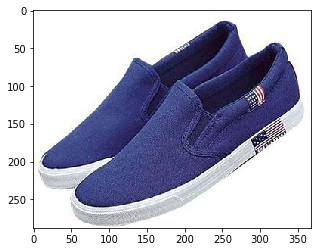

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mp_img
import os

filename = './rabbers.jpg'
image = mp_img.imread(filename)

# print("Image shape", image.shape)
# print("Image array", image)

plt.imshow(image)
plt.show()

Transposed image shape (368, 288, 3)


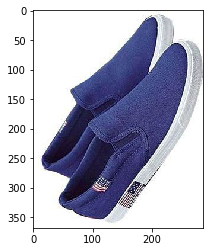

In [7]:
x = tf.Variable(image, name='x')
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # transpose = tf.transpose(x, perm=[1, 0, 2])
    transpose = tf.image.transpose_image(x)
    result = sess.run(transpose)
    
    print("Transposed image shape", result.shape)
    plt.imshow(result)
    plt.show()

In [8]:
# read in a list of images
from PIL import Image

In [19]:
original_image_list = ['./shoes/lophas2.jpeg', './shoes/lophas4.jpeg',
                       './shoes/lophas5.jpg', './shoes/rabbers2.jpg', './shoes/rabbers3.jpg']
filename_queue = tf.train.string_input_producer(original_image_list)
image_reader = tf.WholeFileReader()
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    image_list = []
    for i in range(len(original_image_list)):
        _, image_file = image_reader.read(filename_queue)
        
        image = tf.image.decode_jpeg(image_file)
        
        image = tf.image.resize_images(image, [224, 224])
        image.set_shape([224, 224, 3])
        
        image_array = sess.run(image)
        print(image_array.shape)
        
        Image.fromarray(image_array.astype('uint8'), 'RGB').show()
        
        image_list.append(tf.expand_dims(image_array, 0))
        
    coord.request_stop()
    coord.join(threads)
    
    index = 0
    
    summary_writer = tf.summary.FileWriter('./m4_example2', graph=sess.graph)
    
    for image_tensor in image_list:
        summary_str = sess.run(tf.summary.image('image-'+str(index), image_tensor))
        summary_writer.add_summary(summary_str)
        index += 1
    summary_writer.close()

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
